# This dataset is based on Holywood movie budget and revenue data. This dataset is perfect for trying out some new tools like scikit-learn to run a linear regression and seaborn, a popular data visualisation library built on top of Matplotlib

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('cost_revenue_dirty.csv')
df.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [6]:
df.isna().values.any()

False

In [7]:
df.isna().values.sum()

0

### Converting the USD_Production_Budget, USD_Worldwide_Gross, and USD_Domestic_Gross columns to a numeric format by removing $ signs and ,

In [8]:
data = df.copy()

char_to_remove = ['$',',']
columns = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']

for column in columns:
    for char in char_to_remove:
        data[column] = data[column].astype(str).str.replace(char,'', regex=True)
    data[column] = pd.to_numeric(data[column])
    
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


### Converting the Release_Date column to a Pandas Datetime type.

In [9]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


#### What are the highest production budget  film?

In [10]:
#highest production budget film
hst_budget_film = data[data.USD_Production_Budget == data.USD_Production_Budget.max()]
hst_budget_film

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


#### How much revenue did the lowest and highest budget films make?

In [11]:
#revenue by lowest budget film

rev_lwst_budget = data[data.USD_Production_Budget == data.USD_Production_Budget.min()]
rev_lwst_budget

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [12]:
#revenue by highest budget film
rev_hst_budget = data[data.USD_Production_Budget == data.USD_Production_Budget.max()]
rev_hst_budget

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


####  Creating a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

In [13]:
new_subset = data[(data['USD_Domestic_Gross'] == 0) & (data['USD_Worldwide_Gross'] != 0)]
new_subset.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


In [14]:
#we can take below way to get above details

new_subset1 = data.query('USD_Domestic_Gross == 0 & USD_Worldwide_Gross !=0')
new_subset1.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


#### Identify which films were not released yet as of the time of data collection (May 1st, 2018)

In [15]:
data_date = pd.Timestamp('2018-05-01')
data_date

Timestamp('2018-05-01 00:00:00')

In [16]:
unreleased_films = data[data.Release_Date >= data_date]
unreleased_films

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


#### Create another DataFrame called data_clean that does not include unreleased films

In [17]:
clean_data = data.drop(unreleased_films.index)
clean_data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


#### What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [18]:
films_no_revenue = clean_data[clean_data.USD_Production_Budget > clean_data.USD_Worldwide_Gross]
percentage_of_films_no_rev = len(films_no_revenue)/len(clean_data) * 100
percentage_of_films_no_rev

37.27711738484398

# Seaborn Data Visualization

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

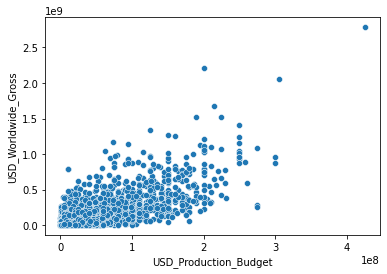

In [20]:
sns.scatterplot(data=clean_data, x='USD_Production_Budget', y='USD_Worldwide_Gross')
plt.show()

#### But the reason we're using Seaborn is because of the hue and size parameters that make it very easy to create a bubble chart. These parameters allow us to colour the data and change their size according to one of the columns in our DataFrame.One more thing, we will use matplotlib to determine size

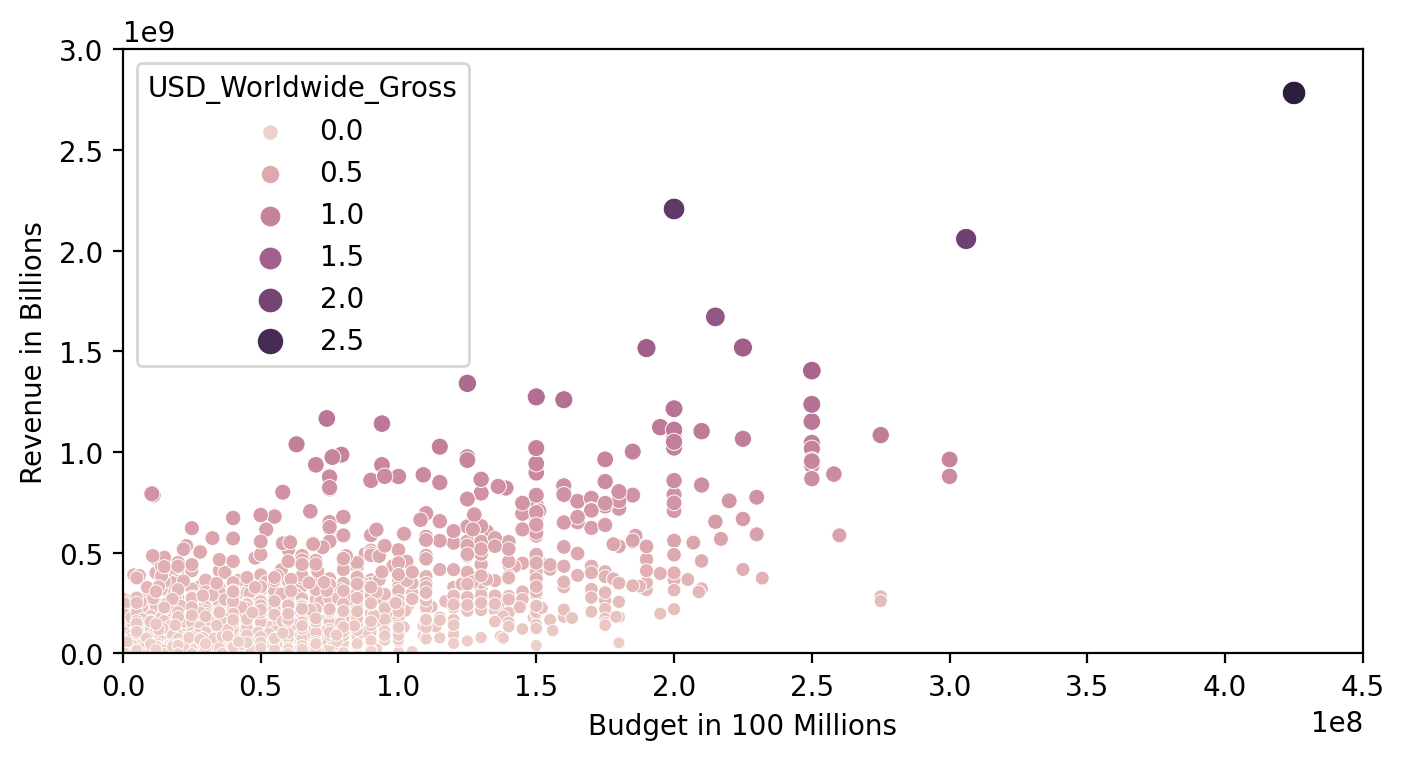

In [21]:
plt.figure(figsize=(8,4), dpi=200)

ax = sns.scatterplot(data=clean_data, x='USD_Production_Budget', y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', size='USD_Worldwide_Gross' )

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       xlabel='Budget in 100 Millions',
       ylabel = 'Revenue in Billions'
      )

plt.show()

#### In addition to 'darkgrid', Seaborn has a number of built-in themes. so you can style your chart very quickly. Try out 'whitegrid', 'dark',  or 'ticks' for example.

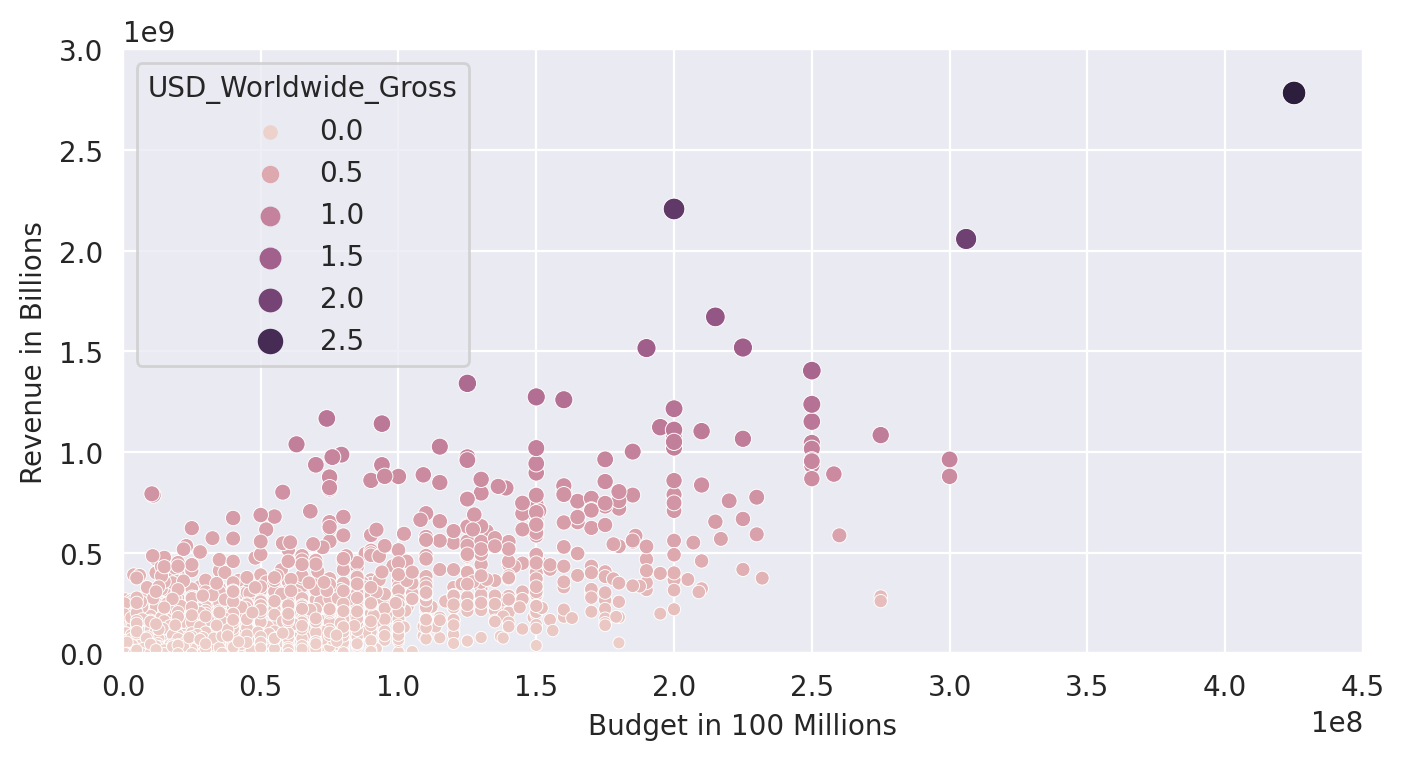

In [22]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):

    ax = sns.scatterplot(data=clean_data, x='USD_Production_Budget', y='USD_Worldwide_Gross',
                         hue='USD_Worldwide_Gross', size='USD_Worldwide_Gross' )

    ax.set(ylim=(0, 3000000000),
           xlim=(0, 450000000),
           xlabel='Budget in 100 Millions',
           ylabel = 'Revenue in Billions'
          )

plt.show()

#### Movie Budget over time

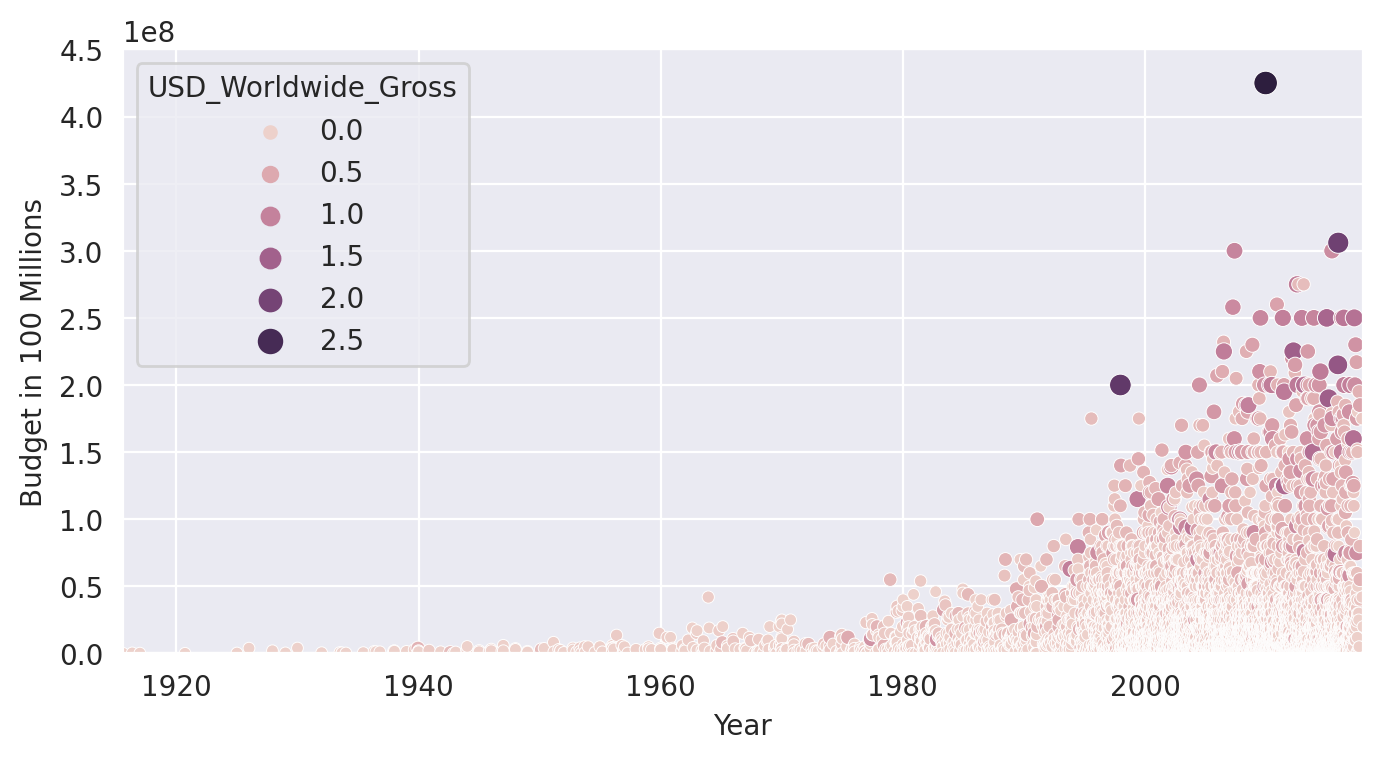

In [23]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):

    ax = sns.scatterplot(data=clean_data, x='Release_Date', y='USD_Production_Budget',
                         hue='USD_Worldwide_Gross', size='USD_Worldwide_Gross' )

    ax.set(xlim=(clean_data.Release_Date.min(), clean_data.Release_Date.max()),
           xlabel='Year',
           ylim=(0, 450000000),
           ylabel='Budget in 100 Millions',
          )

plt.show()

#### Trick to convert years to decade

In [24]:
# we need to convert dates to Datetimeindex to extract years,months etc

dt_index = pd.DatetimeIndex(clean_data.Release_Date)
years = dt_index.year
months = dt_index.month
day = dt_index.day
print(f"years = {years}, months = {months}, day = {day}")

years = Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=5384), months = Int64Index([ 8,  5, 12,  9,  1, 12, 12,  1,  1, 12,
            ...
             8,  9,  9, 10, 10, 10, 10, 12, 12, 12],
           dtype='int64', name='Release_Date', length=5384), day = Int64Index([ 2,  9, 24, 17,  1, 30,  8,  2,  1, 31,
            ...
            25,  6,  6,  2,  2,  2,  3,  5,  5, 31],
           dtype='int64', name='Release_Date', length=5384)


In [25]:
#now convert the year to decade like 1999 to  1990 i.e 90's decade
1999//10

199

In [26]:
199*10

1990

In [27]:
decades = years //10 *10
clean_data['Decade'] = decades
clean_data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


#### Now create two dataset old film and new films (old films should include all films before 1970)

In [28]:
old_films = clean_data[clean_data.Decade < 1970]
new_films = clean_data[clean_data.Decade >=1970]

In [29]:
old_films.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.000000,1.530000e+02,1.530000e+02,1.530000e+02,153.000000
mean,4274.771242,4.611298e+06,3.041963e+07,2.238947e+07,1949.150327
std,742.137130,5.713649e+06,5.493183e+07,3.264175e+07,12.719014
min,1253.000000,1.000000e+05,0.000000e+00,0.000000e+00,1910.000000
25%,3973.000000,1.250000e+06,5.273000e+06,5.000000e+06,1940.000000
50%,4434.000000,2.900000e+06,1.000000e+07,1.000000e+07,1950.000000
75%,4785.000000,5.000000e+06,3.320810e+07,2.835000e+07,1960.000000
max,5299.000000,4.200000e+07,3.905252e+08,1.986805e+08,1960.000000


In [31]:
new_films.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,5231.000000,5.231000e+03,5.231000e+03,5.231000e+03,5231.000000
mean,2651.997897,3.181144e+07,9.068350e+07,4.184192e+07,2000.187345
std,1549.334078,4.075858e+07,1.704250e+08,6.670273e+07,9.582253
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,1970.000000
25%,1314.500000,5.000000e+06,3.831677e+06,1.252581e+06,2000.000000
50%,2629.000000,1.800000e+07,2.854412e+07,1.751012e+07,2000.000000
75%,3967.500000,4.000000e+07,9.877700e+07,5.330158e+07,2010.000000
max,5391.000000,4.250000e+08,2.783919e+09,9.366622e+08,2010.000000


#### Linear regression with seaborn

<AxesSubplot:xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

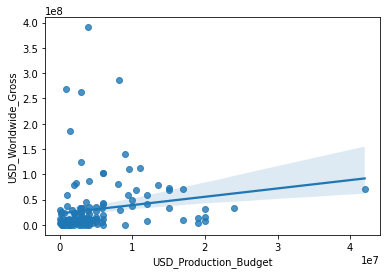

In [32]:
#lets visualize relationship between movie budget and worldwide grossusing linear regression for old films

sns.regplot(data=old_films, x = 'USD_Production_Budget', y = 'USD_Worldwide_Gross')

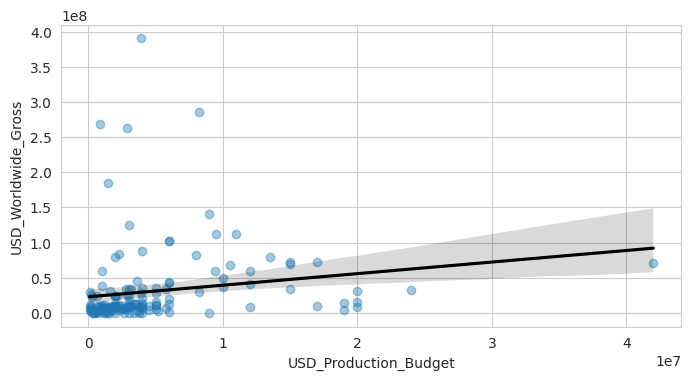

In [39]:
#to style it further we can go to matplotlib layer

plt.figure(figsize=(8,4), dpi=100)

with sns.axes_style('whitegrid'):
    sns.regplot(data=old_films, x = 'USD_Production_Budget', y = 'USD_Worldwide_Gross',
                line_kws = {'color':'black'},
                scatter_kws= {'alpha':0.4})
    



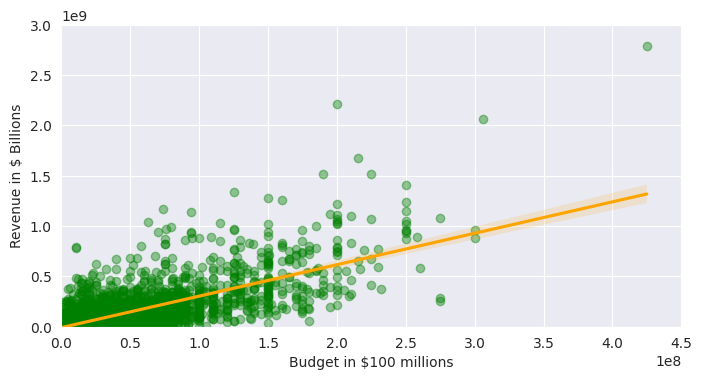

In [46]:
#new film

plt.figure(figsize=(8,4), dpi=100)

with sns.axes_style('darkgrid'):
    ax =sns.regplot(data=new_films, x = 'USD_Production_Budget', y = 'USD_Worldwide_Gross',
               color='green',
               line_kws={'color': 'orange'},
               scatter_kws={'alpha': 0.4})
    
    ax.set(xlim=(0,450000000),
           ylim=(0,3000000000),
           xlabel='Budget in $100 millions',
           ylabel= 'Revenue in $ Billions')


#### To find out how much extra revenue we can expect for an additional $1 increase in the budget and to do that we need to dive into the numbers underlying our regression model

# Using scikit learn to run our own regression

#### Using our data on budgets, the linear regression estimates the best possible line to fit our movie revenues. 
The regression line has the following structure:

y = mx +c

y=revenue, m=slope, c=Y intercept

In [47]:
from sklearn.linear_model import LinearRegression

In [51]:
#please note when selecting single column it will be pandas data series but we need pandas dataframe.If 
# we select like X = new_films['USD_Production_Budget'], it will be series so we need to put it under another third bracket
#another way around is X= pd.DataFrame(new_films, columns=['USD_Production_Budget'])

X = new_films[['USD_Production_Budget']]
type(X)

pandas.core.frame.DataFrame

In [53]:
y = new_films[['USD_Worldwide_Gross']]

In [54]:
regression = LinearRegression()

In [55]:
regression.fit(X,y)

LinearRegression()

In [56]:
#constant c is intercept
regression.intercept_

array([-8650768.00661042])

In [57]:
#slope m

regression.coef_

array([[3.12259592]])

#### What about the slope? The slope tells us that for every extra 1 dollar in  the budget, movie revenue increases by 3.12259592 dollar

In [58]:
#R squaredis a measure figuring out how well our model fits our data

regression.score(X,y)

0.5577032617720403

#### We see that our r-squared comes in at around 0.558. This means that our model explains about 56% of the variance in movie revenue. That's actually pretty amazing, considering we've got the simplest possible model, with only one explanatory variable. The real world is super complex, so in many academic circles, if a researcher can build a simple model that explains over 50% or so of what is actually happening, then it's a pretty decent model.

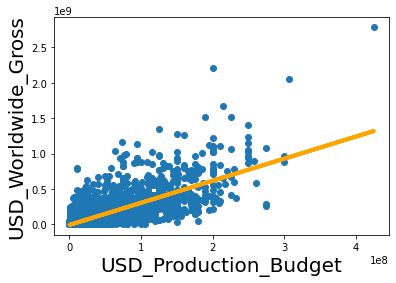

In [64]:
plt.scatter(X,y)
yhat = 3.12 *X -8650768.00661042
fig = plt.plot(X,yhat, lw=4,c='orange',label='Regression Line')
plt.xlabel('USD_Production_Budget', fontsize=20)
plt.ylabel('USD_Worldwide_Gross', fontsize=20)
plt.show()

# Important note:
1.You will often see the features named capital X and the target named lower case y.

2.Our LinearRegression does not like receiving Pandas Series (e.g., new_films.USD_Production_Budget), so I've created some new DataFrames here.


3. How do we interpret the y-intercept? Literally, means that if a movie budget is  dollar 0, the estimated movie revenue is -8.65 million dollar. Hmm... 
so this is clearly unrealistic.After all, it's just an estimate and this estimate will be the most accurate on the chart where 
we have the most data points (rather than at the extreme left or right).

4.What about the slope? The slope tells us that for every extra dollar 1 in the budget, movie revenue increases by dollar 3.1. So, that's pretty interesting.

5.Higher R2 value represents, we can do good estimate from chart but it is tought to predict with lower R2 value like 0.2/0.02.
We see that our r-squared comes in at around 0.558. This means that our model explains about 56% of the variance in movie revenue. 
That's actually pretty amazing, considering we've got the simplest possible model, with only one explanatory variable. 
The real world is super complex, so in many academic circles, if a researcher can build a simple model that explains over 50% or so of 
what is actually happening, then it's a pretty decent model.

# regression using statsmodel

In [71]:
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [67]:
X1 = new_films[['USD_Production_Budget']]
y1 = new_films[['USD_Worldwide_Gross']]

In [68]:
C = sm.add_constant(X1)
result = sm.OLS(y1,C).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     USD_Worldwide_Gross   R-squared:                       0.558
Model:                             OLS   Adj. R-squared:                  0.558
Method:                  Least Squares   F-statistic:                     6593.
Date:                 Tue, 21 Dec 2021   Prob (F-statistic):               0.00
Time:                         10:38:52   Log-Likelihood:            -1.0444e+05
No. Observations:                 5231   AIC:                         2.089e+05
Df Residuals:                     5229   BIC:                         2.089e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -8.651e+06   1.99e+06     -4.351      0.000   -1.25e+07   -4.75e+06
USD_Production_Budget     3.1226      0.038     81.200      0.000       3.047       3.198
==============================================================================
Omnibus:                     3957.474   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           170020.245
Skew:                           3.192   Prob(JB):                         0.00
Kurtosis:                      30.190   Cond. No.                     6.56e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.56e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

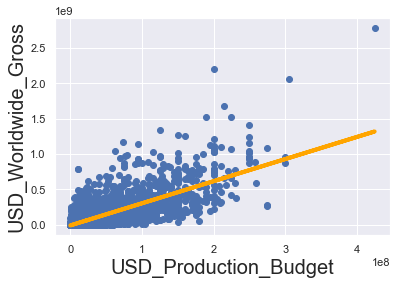

In [72]:
plt.scatter(X1,y1)
yhat = 3.1226 * X1 - 8.651e+06
fig = plt.plot(X1,yhat, lw=4,c='orange',label='Regression Line')
plt.xlabel('USD_Production_Budget', fontsize=20)
plt.ylabel('USD_Worldwide_Gross', fontsize=20)
plt.show()